This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

In [39]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Working with Keras: a deep dive

## A spectrum of workflows

The design of the Keras API is guided by the principle of **progressive disclosure of complexity**: make it easy to get started, yet make it possible to handle high-complexity use cases, only requiring incremental learning at each step. Simple use cases should be easy and approachable, and arbitrarily advanced workflows should be possible: no matter how niche and complex the thing you want to do, there should be a clear path to it. A path that builds upon the various thing you’ve learned from simpler workflows. This means that you can grow from beginner to expert and still use the same tools—only in different ways.

As such, there’s not a single "true" way of using Keras. Rather, Keras offers a spectrum of workflows, from the very simple to the very flexible. There are different ways to build Keras models, and different ways to train them, answering different needs. Because all these workflows are based on shared APIs, such as `Layer` and `Model`, components from any workflow can be used in any other workflow: they can all talk to each other.


## Different ways to build Keras models

There are three APIs for building models in Keras:

- The **Sequential model**, the most approachable API—it’s basically a Python list. As such, it’s limited to **simple stacks of layers**.
- The **Functional API**, which focuses on **graph-like model architectures**. It represents a nice mid-point between usability and flexibility, and as such, it’s the most commonly-used model-building API.
- **Model subclassing**, a low-level option where you write everything yourself from scratch. This is ideal if you want full control over every little thing. However, you won’t get access to many built-in Keras features, and you will be more at risk of making mistakes.

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/progressive_disclosure_of_complexity_models.png)

### The Sequential model

**The Sequential class**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

Note that it’s possible to build the same model incrementally, via the `add()` method, similar to the `append()` method of a Python list:

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**Calling a model for the first time to build it**

You’ve seen in chapter 4 that layers only get built (which is to say, create their weights) when they are called for the first time. That’s because the shape of the layers' weights depend on the shape of their input: **until the input shape is known, they can’t be created**.

As such, the Sequential model above does not have any weights until you actually call it on some data, or call its `build()` method with an input shape:

In [15]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.27145636, -0.13949892,  0.06876865,  0.16211155,  0.16421267,
         -0.12415816, -0.18592869, -0.25711367, -0.12244853,  0.26597273,
         -0.24261408, -0.23034295, -0.2550316 ,  0.19015709,  0.2923563 ,
          0.21959764, -0.2598512 ,  0.03888521, -0.00825611, -0.24606907,
          0.24059331,  0.08045286, -0.13243103,  0.1336866 ,  0.2381221 ,
         -0.06626058,  0.14362139, -0.17734231, -0.01623389, -0.06820379,
         -0.2127708 , -0.29538128, -0.28938666,  0.02677906, -0.15015887,
         -0.2812689 ,  0.27614492, -0.14703463,  0.22619879, -0.29392764,
         -0.24272838, -0.06267615, -0.24999204, -0.2095384 ,  0.0046418 ,
         -0.05937141,  0.1997489 , -0.17595418, -0.28289235,  0.2511968 ,
          0.21830106,  0.1303862 ,  0.19777128,  0.18978602, -0.18642356,
          0.11958215,  0.17256802,  0.15803283, -0.1232031 , -0.16810517,
         -0.1517965 , -0.17064722, -0.21442

**The summary method**

After the model is built, you can display its contents via the `summary()` method, which comes handy for debugging:

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the `name` argument**

As you can see your model happens to be named "sequential_1". You can actually give names to everything in Keras—every model, every layer. Like this:

In [16]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_last_layer (Dense)        (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

When building a Sequential model incrementally, it’s useful to be able to print a summary of what the current model looks like after you add each layer. But you can’t print a summary until the model is built! There’s actually a way to have your Sequential get built on the fly: just **declare the shape of the model’s inputs in advance**. You can do this via the Input class:

In [31]:
# With explicit InputLayer.
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(3,)),
  keras.layers.Dense(64)])

In [32]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Without InputLayer and let the first layer to have the input_shape.
# Keras will add a input for the model behind the scene.
model = keras.Sequential([
  keras.layers.Dense(64, input_shape=(3,))])

In [34]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

The Sequential model is easy to use, but its applicability is extremely limited: it can **only express models with a single input and a single output**, applying one layer after the other in a sequential fashion. In practice, it’s pretty common to encounter models with **multiple inputs** (say, an image and its metadata), **multiple outputs** (different things you want to predict about the data), or a **non-linear topology**.

In such cases, you’d build your model using the **Functional API**. This is what most Keras models you’ll encounter in the wild use. It’s fun and powerful—it feels like playing with LEGO bricks.


#### A simple example

Let’s start with something simple: the two-layer stack of layers we used in the section above. 

**A simple Functional model with two Dense layers**

In [41]:
inputs = keras.Input(shape=(3,), name="my_input")  # no longer a layer but a tensor!
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

We started by declaring an `Input` (note that you can also give names to these input objects, like everything else)

In [65]:
inputs = keras.Input(shape=(3,), name="my_input")
#inputs = tf.random.normal([3, 10])

This inputs object holds information about the `shape` and `dtype` of the data that the model will process

In [66]:
inputs.shape

TensorShape([None, 3])

In [67]:
inputs.dtype

tf.float32

We call such an object a __symbolic tensor__. It doesn’t contain any actual data, but it encodes the specifications of the actual tensors of data that the model will see when you use it. It stands for future tensors of data.

Next, we created a layer and called it on the input:

In [68]:
features = layers.Dense(64, activation="relu")(inputs)

All Keras layers can be called **both on real tensors of data, or on these symbolic tensors**. In the latter case, they return a new symbolic tensor, with updated shape and dtype information:

In [69]:
features.shape

TensorShape([None, 64])

After obtaining the final outputs, we instantiated the model by specifying its inputs and outputs in the `Model` constructor:

In [70]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [71]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

Unlike this toy model, most deep learning models don’t look like lists—they look like **graphs**. They may, for instance, have multiple inputs or multiple outputs. It’s for this kind of model that the **Functional API** really shines.

Let’s say you’re building a system to rank customer support tickets by priority and route them to the appropriate department. Your model has three inputs:

- The title of the ticket (text input)
- The text body of the ticket (text input)
- Any tags added by the user (categorical input, assumed here to be one-hot encoded)

We can encode the text inputs as arrays of ones and zeros of size vocabulary_size (see chapter 11 for detailed informations about text encoding techniques).

Your model also has two outputs:

- The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
- The department that should handle the ticket (a softmax over the set of departments)

**A multi-input, multi-output Functional model**

In [72]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# Define model inputs
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# Combine input features into a single tensor, features, by concatenating them
features = layers.Concatenate()([title, text_body, tags])
# Apply intermediate layer to recombine input features into richer representations
features = layers.Dense(64, activation="relu")(features)

# Define model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

The Functional API is a simple, LEGO-like, yet very flexible way to define arbitrary graphs of layers like these.

#### Training a multi-input, multi-output model

You can train your model in much the same way as you would train a `Sequential` model, by calling `fit()` with lists of input and output data. These lists of data should respect the same order as what you passed to the `Model()` constructor.

**Training a model by providing lists of input & target arrays**

In [74]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
history = model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 2s 35ms/step - loss: 3.5988 - priority_loss: 0.3289 - department_loss: 3.2699 - priority_mean_absolute_error: 0.4927 - department_accuracy: 0.2930


In [76]:
history.history

{'loss': [6.436682224273682],
 'priority_loss': [0.3289239704608917],
 'department_loss': [6.107758045196533],
 'priority_mean_absolute_error': [0.4926694333553314],
 'department_accuracy': [0.23984375596046448]}

**Training a model by providing dicts of input & target arrays**

If you don’t want to rely on input order (for instance because you have many inputs or outputs), you can also leverage the names you gave to the `Input` objects and to the output layers, and pass data via dictionaries:

In [77]:
model.compile(optimizer="adam",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 2s 36ms/step - loss: 3.6681 - priority_loss: 0.3289 - department_loss: 3.3392 - priority_mean_absolute_error: 0.4927 - department_accuracy: 0.1008


#### The power of the Functional API: access to layer connectivity

A Functional model is an explicit **graph data structure**. This make it possible to inspect how layers are connected and **reuse previous graph nodes** (which are layer outputs) as part of new models. It also nicely fits the "mental model" that most researchers use when thinking about a deep neural network: a graph of layers.

This enables two important use cases: **model visualization**, and **feature extraction**. Let’s take a look.

##### Plotting layer connectivity

In [78]:
keras.utils.plot_model(model, "ticket_classifier.png")

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ticket_classifier.png)

In [79]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ticket_classifier_with_shapes.png)

The "None" in the tensor shapes represents the **batch size**: this model allows batches of any size.

##### Feature extraction with a Functional model

**Retrieving the inputs or outputs of a layer in a Functional model**

Access to layer connectivity also means that you can inspect and reuse individual nodes (layer calls) in the graph. The model property `model.layers` provides the list of layers that make up the model, and for each layer you can query `layer.input` and `layer.output`

In [81]:
model.layers

In [89]:
for i, layer in enumerate(model.layers):
    print(f"{i}. layer name:", layer.name)
    
    if not isinstance(layer.input, list):
        print("inputs:", layer.input)
    else:
        for i, input_ in enumerate(layer.input):
            print(f"input {i}.: {input_}")
    
    if not isinstance(layer.output, list):
        print("outputs:", layer.output)
    else:
         for i, output in enumerate(layer.output):
            print(f"output {i}.: {output}")
            
    print()

0. layer name: title
inputs: KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='title'), name='title', description="created by layer 'title'")
outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='title'), name='title', description="created by layer 'title'")

1. layer name: text_body
inputs: KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='text_body'), name='text_body', description="created by layer 'text_body'")
outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='text_body'), name='text_body', description="created by layer 'text_body'")

2. layer name: tags
inputs: KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='tags'), name='tags', description="created by layer 'tags'")
outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='tags'), name='tags', description="created by layer 'tags'")

3. layer name: conca

**Creating a new model by reusing intermediate layer outputs**

This enables you to do **feature extraction**: creating models that reuse intermediate features from another model.

Let’s say you want to add another output to the model we defined above—you want to also predict an estimate of how long a given issue ticket will take to resolve, a kind of difficulty rating. You could do this via a classification layer over 3 categories—"quick", "medium", "difficult". You don’t need to recreate and retrain a model from scratch! You can just start from the intermediate features of your previous model, since you have access to them. Like this:


In [90]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

In [91]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/updated_ticket_classifier.png)

### Subclassing the `Model` class

The last model building pattern you should know about is the most advanced one: **Model subclassing**. You’ve already learned in chapter 3 how to subclass the `Layer` class to create custom layers. Subclassing `Model` is pretty similar:

- In the init method, define the layers the model will use.
- In the call method, define the forward pass of the model, reusing the layers previously created.
- Instantiate your subclass and call it on data to create its weights.

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

Let’s take a look at a simple example: we will reimplement the customer support ticket management model using a `Model` subclass.

In [93]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        # define all the layers in the model but the input
        # note: you do not call the layers on anything! That is the job of the call method (forward pass)
        super().__init__()  # call the super constructor
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        # define the forward pass through the model
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [96]:
model = CustomerTicketModel(num_departments=4)
print(model.weights)  # no weights yet!

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

[]


You can compile and train a `Model` subclass just like a `Sequential` or `Functional` model:

In [97]:
model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 2s 36ms/step - loss: 3.4584 - output_1_loss: 0.3289 - output_2_loss: 3.1295 - output_1_mean_absolute_error: 0.4927 - output_2_accuracy: 0.5891


The Model subclassing workflow is the most flexible way to build a model: it **enables you to build models that cannot be expressed as directed acyclic graphs of layer**—imagine, for instance, a model where the call() method uses layers inside a for loop, or even calls them recursively. Anything is possible—you’re in charge.

In [102]:
model.mixing_layer.input

AttributeError: Layer dense_28 is not connected, no input to return.

#### Beware: what subclassed models don't support

For instance, because the way layers are connected to each other is hidden inside the body of the `call()` method, you cannot access that information. Calling `summary()` will **not display layer connectivity**, and you **cannot plot the model** topology via `plot_model()`. Likewise, if you have a subclassed model, you **cannot access the nodes of the graph** of layers to do feature extraction—because there is simply no graph. Once the model is instantiated, its forward pass becomes a complete blackbox.

### Mixing and matching different components

Crucially, choosing one of these patterns—the Sequential model, the Functional API, Model subclassing—does not lock you out of the others. **All models in the Keras API can smoothly interoperate with each other**, whether they’re Sequential models, Functional models, or subclassed models written from scratch. They’re all part of the same spectrum of workflows.

**Creating a Functional model that includes a subclassed model**

In [103]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)  # here we use our own Model subclass!
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [0]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier  # here we use a Functional model that was defined outside!

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: use the right tool for the job

In general, the Functional API provides you with a pretty good trade-off between easy-of-use and flexibility. It also gives you direct access to layer connectivity, which is **very powerful for use cases such as model plotting or feature extraction**. If you can use the Functional API—that is, if your model can be expressed as a **directed acyclic graph of layers**—I recommend using it over model subclassing.

Going forward, all examples in this book will use the Functional API—simply because all of the models we will work with are expressible as graphs of layers. We will, however, make frequent use of subclassed layers. In general, using Functional models that include subclassed layers provides the best of both world: high development flexibility while retaining the advantages of the Functional API.


## Using built-in training and evaluation loops

You are already familiar with the `compile()`, `fit()`, `evaluate()`, `predict()` workflow. As a reminder, it looks like this:

**The standard workflow: `compile()` / `fit()` / `evaluate()` / `predict()`**

In [7]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.9128 - val_loss: 0.1546 - val_accuracy: 0.9541
Epoch 2/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1640 - accuracy: 0.9544 - val_loss: 0.1217 - val_accuracy: 0.9680
Epoch 3/3
313/313 [==============================] - 0s 891us/step - loss: 0.1045 - accuracy: 0.9729


There are a few ways you can customize this simple workflow:

- Providing your own custom metrics
- Passing **callbacks** to the `fit()` method to schedule actions to be taken at specific points during training

### Writing your own metrics

Commonly used metrics for classification and regression are already part of the built-in `keras.metrics` module—most of the time, that’s what you will use. But if you’re doing anything out of the ordinary, you will need to be able to write your own metrics. It’s simple!

**Implementing a custom metric by subclassing the `Metric` class**

For example, here’s a simple custom metric that measures the Root Mean Squared Error (RMSE).

In [0]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
    
    # You use the result() method to return the current value of the metric:
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [0]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

### Using Callbacks

The Keras callbacks API will help you transform your call to `model.fit()` from a paper airplane into a smart, autonomous drone that can self-introspect and dynamically take action.

A callback is an object (a class instance implementing specific methods) that is passed to the model in the call to `fit()` and that is called by the model at various points during training. **It has access to all the available data about the state of the model and its performance**, and it can take action: **interrupt training, save a model, load a different weight set, or otherwise alter the state of the model**.

Here are some examples of ways you can use callbacks:

- **Model checkpointing** — Saving the current state of the model at different points during training.
- **Early stopping** — Interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
- **Dynamically adjusting the value of certain parameters during training** — Such as the learning rate of the optimizer.
- **Logging training and validation metrics during training**, or visualizing the representations learned by the model as they’re updated — The `fit()` progress bar that you’re familiar with is in fact a callback!

#### The `EarlyStopping` and `ModelCheckpoint` callbacks

The `EarlyStopping` callback interrupts training once a target metric being monitored has stopped improving for a fixed number of epochs. For instance, this callback allows you to interrupt training as soon as you start overfitting, thus avoiding having to retrain your model for a smaller number of epochs. This callback is typically used in combination with `ModelCheckpoint`, which lets you continually save the model during training 

**Using the `callbacks` argument in the `fit()` method**

In [10]:
# Callbacks are passed to the model via the callbacks argument in fit(), 
# which takes a list of callbacks. 
# You can pass any number of callbacks.
callbacks_list = [
    keras.callbacks.EarlyStopping(  # Interrupts training when improvement stops
        monitor="val_accuracy",  # Monitors the model’s validation accuracy
        patience=1,  # Interrupts training when accuracy has stopped improving for more than one epoch (that is, two epochs)
    ),
    keras.callbacks.ModelCheckpoint(  # Saves the current weights after every epoch
        filepath="checkpoint_path.keras",  # Path to the destination model file
        monitor="val_loss",  # These two arguments mean you won’t overwrite the model file unless val_loss has improved, which allows you to keep the best model seen during training.
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=50,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2928 - accuracy: 0.9141 - val_loss: 0.1561 - val_accuracy: 0.9569
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1661 - accuracy: 0.9528 - val_loss: 0.1172 - val_accuracy: 0.9675
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9622 - val_loss: 0.1137 - val_accuracy: 0.9702
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9677 - val_loss: 0.1065 - val_accuracy: 0.9753
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1189 - accuracy: 0.9706 - val_loss: 0.1081 - val_accuracy: 0.9747


Note that you can always save models manually after training as well—just call `model.save('my_checkpoint_path')`. To reload the model you’ve saved, just use:

In [11]:
model = keras.models.load_model("checkpoint_path.keras")

In [20]:
np.argmax(model.predict(train_images[0].reshape(1, 784))), train_labels[0]

(3, 3)

### Writing your own callbacks

Callbacks are implemented by subclassing the class `keras.callbacks.Callback`. You can then implement any number of the following transparently-named methods, which are called at various points during training:

```
on_epoch_begin(epoch, logs)
on_epoch_end(epoch, logs)
on_batch_begin(batch, logs)
on_batch_end(batch, logs)
on_train_begin(logs)
on_train_end(logs)
```

**Creating a custom callback by subclassing the `Callback` class**

Here’s a simple example saving a list of per-batch loss values during training, and saves a graph of these values at the end of each epoch:

In [31]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2908 - accuracy: 0.9147 - val_loss: 0.1432 - val_accuracy: 0.9589
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1640 - accuracy: 0.9544 - val_loss: 0.1291 - val_accuracy: 0.9646
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1375 - accuracy: 0.9632 - val_loss: 0.1118 - val_accuracy: 0.9710
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9675 - val_loss: 0.1127 - val_accuracy: 0.9742
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1160 - accuracy: 0.9698 - val_loss: 0.1119 - val_accuracy: 0.9760
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1113 - accuracy: 0.9732 - val_loss: 0.1090 - val_accuracy: 0.9763
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1029 - accuracy: 0.9756 - val_loss: 0.1255 - val_accuracy:

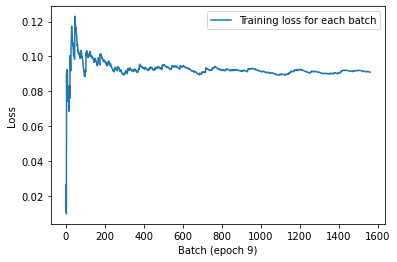

In [32]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

**TensorBoard** is a browser-based application that you can run locally. It’s the best way to monitor everything that goes on inside your model during training. With TensorBoard, you can:

- Visually monitor metrics during training
- Visualize your model architecture 
- Visualize histograms of activations and gradients
- Explore embeddings in 3D

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/the_loop_of_progress.png)

The easiest way to use TensorBoard with a Keras model and the fit method is the `keras.callbacks.TensorBoard` callback.

In [40]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="tensorboard_log",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2934 - accuracy: 0.9130 - val_loss: 0.1493 - val_accuracy: 0.9567
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1612 - accuracy: 0.9545 - val_loss: 0.1217 - val_accuracy: 0.9665
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1411 - accuracy: 0.9623 - val_loss: 0.1168 - val_accuracy: 0.9714
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1238 - accuracy: 0.9679 - val_loss: 0.1086 - val_accuracy: 0.9740
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9710 - val_loss: 0.1100 - val_accuracy: 0.9750
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1088 - accuracy: 0.9733 - val_loss: 0.1121 - val_accuracy: 0.9776
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9744 - val_loss: 0.1129 - val_accuracy:

Once the model starts running, it will write logs at the target location. If you are running you Python script on a local machine, you can then launch the local TensorBoard server using the following command (note that the tensorboard executable should be already available if you have installed TensorFlow via pip; if not, you can install TensorBoard manually via `pip install tensorboard`).

In [41]:
%load_ext tensorboard
%tensorboard --logdir tensorboard_log

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 5536), started 0:05:08 ago. (Use '!kill 5536' to kill it.)

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [0]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

In [0]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [0]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [0]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [0]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

**Writing a step-by-step evaluation loop**

In [0]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with `tf.function`

**Adding a `tf.function` decorator to our evaluation step function**

In [0]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging `fit()` with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [0]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [0]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [0]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [0]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## Chapter summary

- Keras offers a spectrum of different workflows, based on the principle of progressive disclosure of complexity. They all smoothly interoperate together.
- You can build models via the `Sequential` class, via the `Functional` API, or by subclassing the `Model` class. Most of the time, you’ll be using the Functional API.
- The simplest way to train & evaluate a model in via the default `fit()` & `evaluate()` methods.
- Keras **callbacks** provide a simple way to monitor models during your call to `fit()` and automatically take action based on the state of the model.
- You can also fully take control of what `fit()` does by overriding the `train_step()` method.
- Beyond `fit()`, you can also write your own training loops entirely from scratch. This is useful for researchers implementing brand new training algorithms.